In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [40]:
path="C:/Users/nvk90/OneDrive/Desktop/Facial_Emotion/Facial_Emotion/"

In [41]:
path_angry=path+"angry/"

In [42]:
path_disgust=path+"disgust/"

In [43]:
path_fear=path+"fear/"

In [44]:
path_happy=path+"happy/"

In [45]:
path_neutral=path+"neutral/"

In [46]:
path_sad=path+"sad/"

In [47]:
path_surprise=path+"surprise/"

In [48]:
 name_list=["angry","disgust","fear","happy","neutral","sad","surprise"]

In [49]:
path_list=[path_angry,path_disgust,path_fear,path_happy,path_neutral,path_sad,path_surprise]

In [50]:
import os

In [51]:
img_dataset=[]
img_label=[]

In [52]:
for i in range(len(path_list)):
    image_name=os.listdir(path_list[i])
    for img in image_name:
        image=cv2.imread(path_list[i]+img)
        image=cv2.resize(image,(100,100))
        img_dataset.append(np.array(image))
        img_label.append(i)

In [54]:
len(img_dataset),len(img_label)

(28879, 28879)

In [55]:
img_dataset_array=np.array(img_dataset)

In [56]:
img_label_array=np.array(img_label)

In [57]:
X=img_dataset_array

In [58]:
y=img_label_array

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [61]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [62]:
from tensorflow.keras.models import Sequential

In [63]:
smodel=Sequential()

In [64]:
smodel.add(Input(shape=(100,100,3)))

In [65]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [66]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [67]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))


In [68]:
smodel.add(Flatten())
smodel.add(Dense(units=256,activation="relu"))
smodel.add(Dense(units=128,activation="relu"))
smodel.add(Dense(units=64,activation="relu"))
smodel.add(Dense(units=32,activation="relu"))
smodel.add(Dense(units=16,activation="relu"))
smodel.add(Dense(units=8,activation="relu"))
smodel.add(Dense(units=16,activation="relu"))
smodel.add(Dense(units=32,activation="relu"))
smodel.add(Dense(units=32,activation="relu"))
smodel.add(Dense(units=64,activation="relu"))
smodel.add(Dense(units=128,activation="relu"))
smodel.add(Dense(units=256,activation="relu"))
smodel.add(Dense(units=10,activation="softmax"))
smodel.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [70]:
smodel.fit(X_train,y_train,epochs=5)

Epoch 1/5
722/722 [==============================] - 156s 214ms/step - loss: 1.9555 - accuracy: 0.1688
Epoch 2/5
722/722 [==============================] - 129s 179ms/step - loss: 1.8966 - accuracy: 0.2050
Epoch 3/5
722/722 [==============================] - 133s 184ms/step - loss: 1.8293 - accuracy: 0.2481
Epoch 4/5
722/722 [==============================] - 161s 223ms/step - loss: 1.7056 - accuracy: 0.3103
Epoch 5/5
722/722 [==============================] - 162s 225ms/step - loss: 1.5575 - accuracy: 0.3609


In [71]:
smodel.evaluate(X_test,y_test)

181/181 [==============================] - 13s 68ms/step - loss: 1.4375 - accuracy: 0.3975


[1.4374656677246094, 0.3975069224834442]

In [72]:
X_train[698]

array([[[45, 45, 45],
        [46, 46, 46],
        [48, 48, 48],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [66, 66, 66]],

       [[44, 44, 44],
        [45, 45, 45],
        [47, 47, 47],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [66, 66, 66]],

       [[42, 42, 42],
        [43, 43, 43],
        [46, 46, 46],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [67, 67, 67]],

       ...,

       [[34, 34, 34],
        [34, 34, 34],
        [35, 35, 35],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [33, 33, 33]],

       [[31, 31, 31],
        [31, 31, 31],
        [30, 30, 30],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [32, 32, 32]],

       [[30, 30, 30],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [32, 32, 32]]], dtype=uint8)

In [73]:
img_1=X_train[698].reshape((1,)+X_train[698].shape)

In [74]:
img_1.shape

(1, 100, 100, 3)

In [75]:
smodel.predict(img_1)

1/1 [==============================] - 0s 455ms/step


array([[5.7371229e-02, 8.4761858e-01, 1.8502899e-02, 1.4119514e-02,
        2.6293769e-02, 3.3474270e-02, 2.6197655e-03, 1.6020787e-09,
        4.9642983e-09, 1.0838552e-09]], dtype=float32)

In [76]:
np.argmax(smodel.predict(img_1))

1/1 [==============================] - 0s 51ms/step


1

In [77]:
name_list[1]

'disgust'

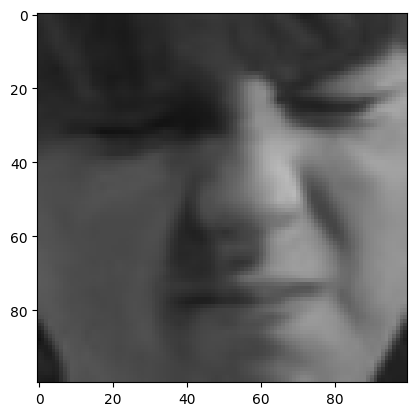

In [78]:
plt.imshow(X_train[698])

In [79]:
img_2=X_train[1698].reshape((1,)+X_train[1698].shape)

In [80]:
smodel.predict(img_2)

1/1 [==============================] - 0s 56ms/step


array([[1.9823454e-01, 5.0531225e-03, 1.4992014e-01, 1.9784307e-01,
        2.0298287e-01, 2.0187673e-01, 4.4079490e-02, 3.6283727e-06,
        4.2626184e-06, 2.1378551e-06]], dtype=float32)

In [81]:
np.argmax(smodel.predict(img_2))

1/1 [==============================] - 0s 58ms/step


4

In [82]:
name_list[4]

'neutral'

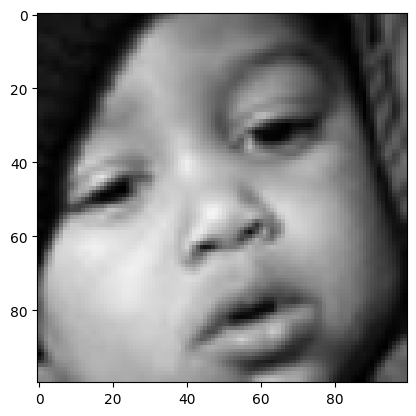

In [83]:
plt.imshow(X_train[1698])